In [19]:
import pandas as pd
import kagglehub
import os
from collections import defaultdict
from PIL import Image
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
path = kagglehub.dataset_download("antoreepjana/animals-detection-images-dataset")

100%|██████████| 8.92G/8.92G [01:45<00:00, 91.0MB/s]

Extracting files...


Understanding the Directory Structure:

In [4]:
print("Main folder contents:")
print(os.listdir(path))

# Check subdirectories (e.g., class names or other organization)
subdirs = [d for d in os.listdir(path) if os.path.isdir(os.path.join(path, d))]
print("\nSubdirectories:")
print(subdirs)

Main folder contents:
['test', 'train']

Subdirectories:
['test', 'train']


Summarizing the File Counts:

In [8]:
# Dictionary to store counts
file_counts = defaultdict(int)

# Traverse through the dataset directory
for root, dirs, files in os.walk(path):
    for file in files:
        file_counts[root] += 1

# Display counts for each subdirectory
for folder, count in file_counts.items():
    print(f"{folder}: {count} files")

C:\Users\gabri\.cache\kagglehub\datasets\antoreepjana\animals-detection-images-dataset\versions\7\test\Bear: 39 files
C:\Users\gabri\.cache\kagglehub\datasets\antoreepjana\animals-detection-images-dataset\versions\7\test\Bear\Label: 39 files
C:\Users\gabri\.cache\kagglehub\datasets\antoreepjana\animals-detection-images-dataset\versions\7\test\Brown bear: 39 files
C:\Users\gabri\.cache\kagglehub\datasets\antoreepjana\animals-detection-images-dataset\versions\7\test\Brown bear\Label: 39 files
C:\Users\gabri\.cache\kagglehub\datasets\antoreepjana\animals-detection-images-dataset\versions\7\test\Bull: 73 files
C:\Users\gabri\.cache\kagglehub\datasets\antoreepjana\animals-detection-images-dataset\versions\7\test\Bull\Label: 73 files
C:\Users\gabri\.cache\kagglehub\datasets\antoreepjana\animals-detection-images-dataset\versions\7\test\Butterfly: 170 files
C:\Users\gabri\.cache\kagglehub\datasets\antoreepjana\animals-detection-images-dataset\versions\7\test\Butterfly\Label: 170 files
C:\Users

Inspecting File Types:

In [9]:
file_extensions = {os.path.splitext(file)[1] for _, _, files in os.walk(path) for file in files}
print("File extensions in the dataset:", file_extensions)

File extensions in the dataset: {'.txt', '.jpg'}


Visualizing Example Files:

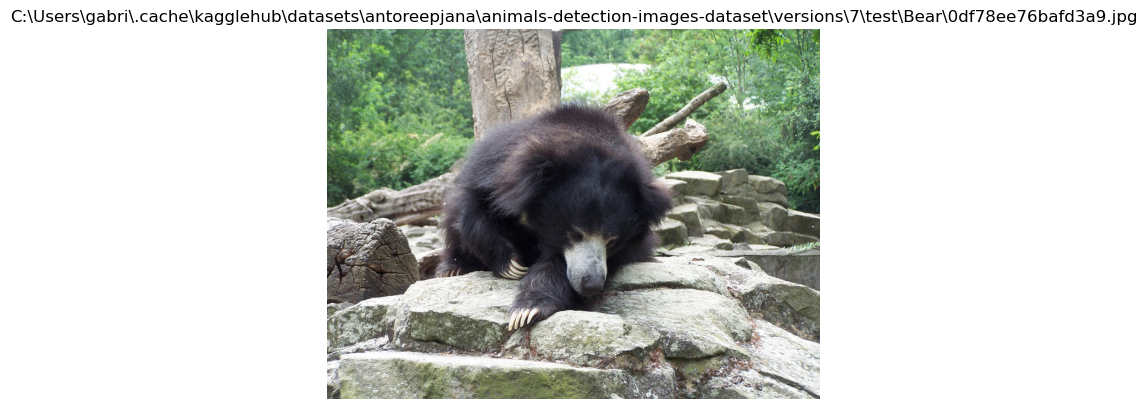

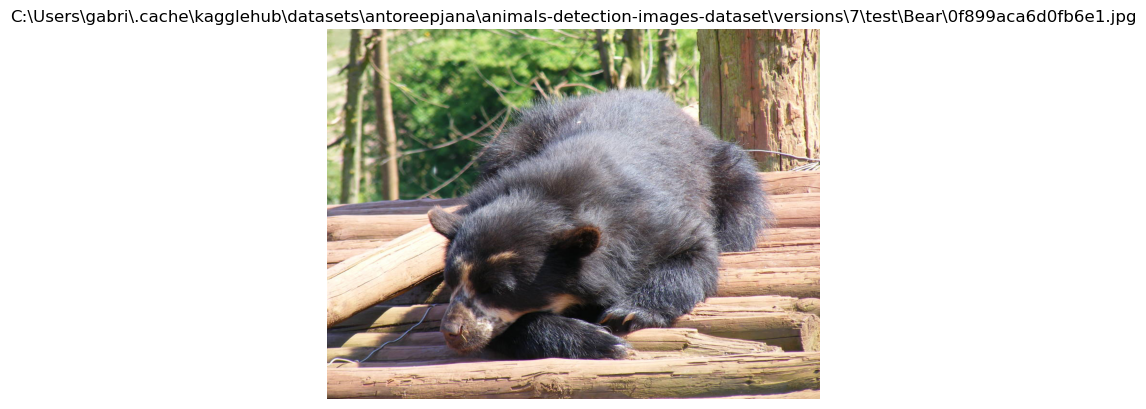

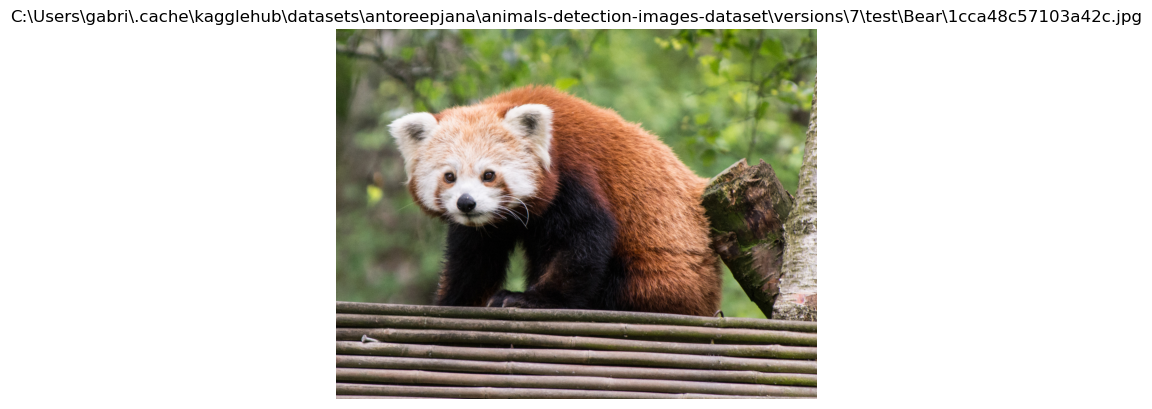

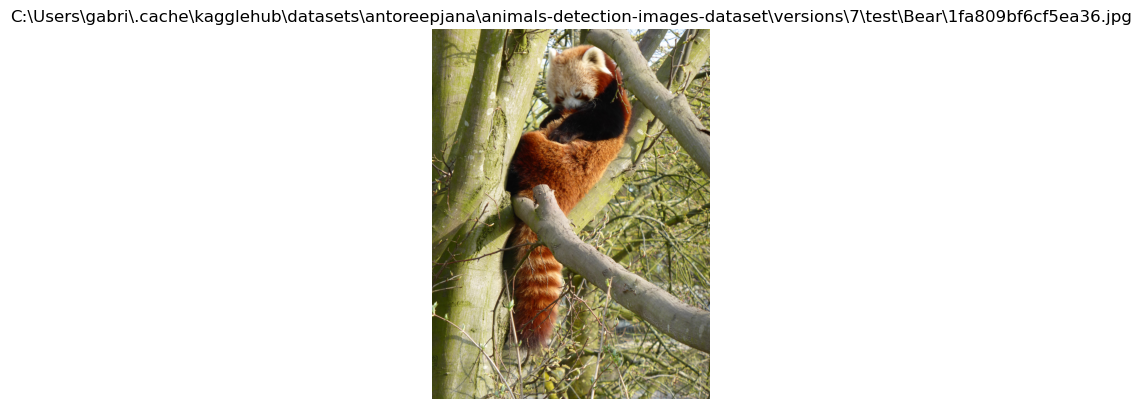

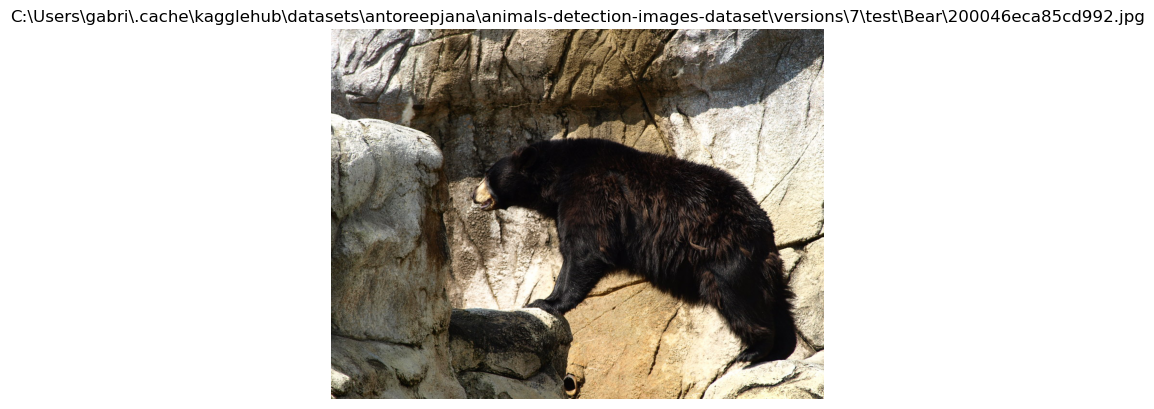

In [12]:
# Load and display a few example images
example_files = [os.path.join(root, file) 
                 for root, _, files in os.walk(path) for file in files][:5]

for file in example_files:
    img = Image.open(file)
    plt.figure()
    plt.imshow(img)
    plt.title(file)
    plt.axis('off')
    plt.show()


Analyzing Image Attributes

Image Dimensions:

In [13]:
dimensions = []

for file in example_files:
    with Image.open(file) as img:
        dimensions.append(img.size)  # (width, height)

print("Example image dimensions:", dimensions)

Example image dimensions: [(1024, 768), (1024, 768), (1024, 787), (768, 1024), (1024, 768)]


Color Channels:

In [14]:
for file in example_files:
    with Image.open(file) as img:
        print(f"{file}: Mode = {img.mode}")

C:\Users\gabri\.cache\kagglehub\datasets\antoreepjana\animals-detection-images-dataset\versions\7\test\Bear\0df78ee76bafd3a9.jpg: Mode = RGB
C:\Users\gabri\.cache\kagglehub\datasets\antoreepjana\animals-detection-images-dataset\versions\7\test\Bear\0f899aca6d0fb6e1.jpg: Mode = RGB
C:\Users\gabri\.cache\kagglehub\datasets\antoreepjana\animals-detection-images-dataset\versions\7\test\Bear\1cca48c57103a42c.jpg: Mode = RGB
C:\Users\gabri\.cache\kagglehub\datasets\antoreepjana\animals-detection-images-dataset\versions\7\test\Bear\1fa809bf6cf5ea36.jpg: Mode = RGB
C:\Users\gabri\.cache\kagglehub\datasets\antoreepjana\animals-detection-images-dataset\versions\7\test\Bear\200046eca85cd992.jpg: Mode = RGB


Creating a DataFrame for Metadata

In [17]:
# Prepare metadata
data = []

# Define valid image extensions
valid_extensions = {'.jpg', '.jpeg', '.png', '.bmp', '.gif', '.tiff'}

for root, _, files in os.walk(path):
    for file in files:
        # Check if the file has a valid image extension
        if os.path.splitext(file)[1].lower() in valid_extensions:
            label = os.path.basename(root)  # Assuming folder name represents the label
            file_path = os.path.join(root, file)
            try:
                with Image.open(file_path) as img:
                    width, height = img.size
                data.append({'file_path': file_path, 'label': label, 'width': width, 'height': height})
            except Exception as e:
                print(f"Error processing file {file_path}: {e}")

# Create DataFrame
df = pd.DataFrame(data)

# Display the first few rows
print(df.head())

                                           file_path label  width  height
0  C:\Users\gabri\.cache\kagglehub\datasets\antor...  Bear   1024     768
1  C:\Users\gabri\.cache\kagglehub\datasets\antor...  Bear   1024     768
2  C:\Users\gabri\.cache\kagglehub\datasets\antor...  Bear   1024     787
3  C:\Users\gabri\.cache\kagglehub\datasets\antor...  Bear    768    1024
4  C:\Users\gabri\.cache\kagglehub\datasets\antor...  Bear   1024     768


Performing DataFrame-Based EDA

Counting files per label:

In [18]:
print(df['label'].value_counts())

label
Butterfly                2045
Lizard                   1460
Moths and butterflies    1458
Fish                     1452
Monkey                   1091
                         ... 
Koala                      80
Tick                       75
Seahorse                   40
Turtle                     29
Squid                      28
Name: count, Length: 80, dtype: int64


Plot distribution of image dimensions:

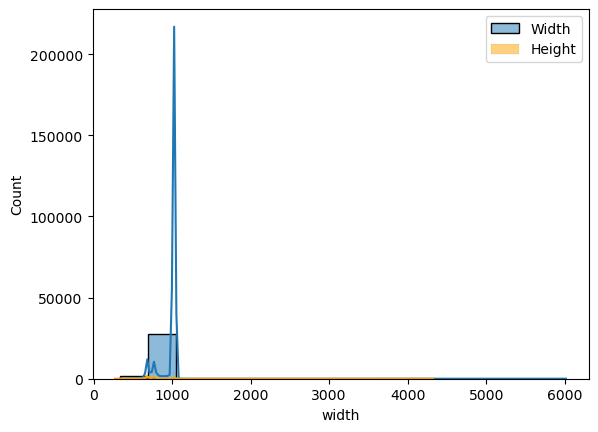

In [20]:
sns.histplot(df['width'], kde=True, label='Width')
sns.histplot(df['height'], kde=True, color='orange', label='Height')
plt.legend()
plt.show()